In [ ]:
from pyparticle.population import build_population
from pathlib import Path
import os

model_output_root = Path.cwd() / "example_data" / "model_output"

timestep = 1 # initial conditions
partmc_dir = model_output_root / "partmc"
partmc_population_cfg = {
        'type':'partmc',
        'partmc_dir': partmc_dir,
        'timestep':timestep,
        'repeat':1, # number of PartMC repeat, if run multiple times
        }
partmc_population = build_population(partmc_population_cfg)

D_min = 1e-9
D_max = 1e-4
N_bins = 300 # number of bins used to analyze MAM4 output
GSDs = [1.8, 1.6, 1.6, 1.8] # geometric standard deviations for each mod
mam4_output_filename = model_output_root / "mam4" / "mam_output.nc"

mam4_population_cfg = {
            'type':'mam4',
            'mam4_dir': model_output_root / "mam4",
            'timestep':timestep,
            'GSD':GSDs, 
            'GMD_init':[1.1e-7, 2.6e-8, 2e-6, 5e-8], # initial GMDs for each mode (will be overwritten if reading from namelist)
            'D_min':1e-9, # minimum diameter for analysis
            'D_max':1e-4, # maximum diameter for analysis 
            'N_bins':N_bins, # number of bins to use for analysis
            'T':293.15, # temperature for analysis
            'p':101325., # pressure for analysis
                }

mam4_population = build_population(mam4_population_cfg)

mfpom2 is not a MAM input parameter; returning 0.0
mfso44 is not a MAM input parameter; returning 0.0


/Users/fier887/Library/CloudStorage/OneDrive-PNNL/Code/pyparticle/src/pyparticle/aerosol_particle.py:260: UserWarning: Surface tension not implemented; returning default 0.072 N/m
  warnings.warn("Surface tension not implemented; returning default 0.072 N/m", UserWarning)


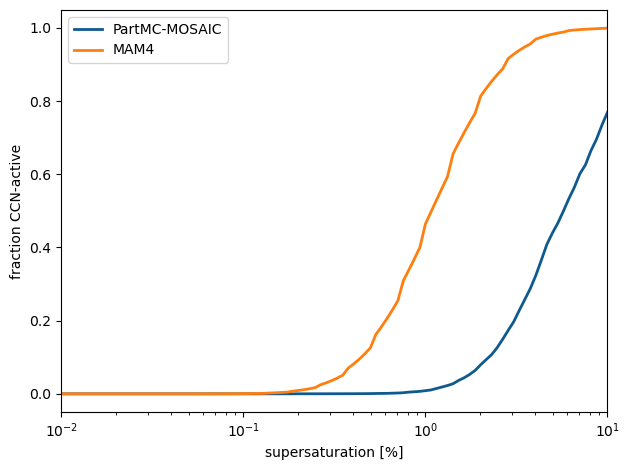

In [2]:
from pyparticle.viz.style import StyleManager, Theme
from pyparticle.viz.builder import build_plotter
import matplotlib.pyplot as plt
# import numpy as np
# series = [
#     {"key": "50", "population": pop_50nm, "label": "$\mu=50$ nm"},
#     {"key": "250", "population": pop_250nm, "label": "$\mu=250$ nm"},
# ]
mgr = StyleManager(Theme(), deterministic=False)


series = [
    {"key": "partmc", "population": partmc_population, "label": "PartMC-MOSAIC"},
    {"key": "mam4", "population": mam4_population, "label": "MAM4"},
]
line_styles = mgr.plan("line", [s["key"] for s in series])


fig, ax = plt.subplots()
for s in series:
    cfg = {
        # "varname": "b_scat",
        # # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
        # "var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        # "style": line_styles[s["key"]],

        "varname": "frac_ccn",
        # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
        #"var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
ax.legend(); fig.tight_layout()